# Presentation on LinearSolve.jl

This is a notebook that will explore the questions of how the package **LinearSolve.jl** is relevant to numerical computing.

### What problems does this package intend to solve?
- This package is intended to solve linear systems faster than the standard BLAS as well as handle LU factorization alongside aiding in being a wrapper to all of the Krylov implementations
- Specifically this package is used internally with SciML in order to speed up and accelerate the process of scientific computing (i.e. scientific machine learning) and simulations
- However, this package is also used elsewhere since it generally speeds the process especially in cases that need to use the `A \ b` code which is solving for the x vector for the equation $Ax = b$. 
  - It also has a more friendly and customizable interface for other numerical applications
  - Used this [link](https://discourse.julialang.org/t/a-b-vs-linearsolve-jl-at-juliacon-2022/85030/2) to reference this specific point

### Who are the stakeholders?
- These are the groups that have had some contributions to this specific software and most likely use it as well
  - Groups were included if someone in the group contributed at least 10 commits to the package; Julia Lab at MIT, Carnegie Mellon University, JuliaHub, Weierstrass Institute, Carbon Engineering, University College London, WIAS-PDElib
- They collaborate on Zulip/Slack but I believe mostly on stack since the Zulip page seems to be pulling from their Slack

### Metrics and Features
- This [video](https://www.youtube.com/watch?v=JWI34_w-yYw) goes into detail over why LinearSolver.jl and specifically it's LU factorization is more optimized but I want to run some simple metrics myself and show you that it can perform better

In [18]:
import Pkg
Pkg.add("LinearSolve")
Pkg.add("ProfileSVG")
Pkg.add("Profile")
Pkg.add("Test")
# Pkg.add("ProfileView")
# Pkg.add("FlameGraphs")
Pkg.add("Plots")
import LinearSolve as LS
import LinearAlgebra as LA

   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  [8dfed614] + Test
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`


In [19]:
n = 10
A = rand(n, n)
b1 = rand(n);
prob = LS.LinearProblem(A, b1)


linsolve = LS.init(prob)
sol1 = LS.solve!(linsolve)

# @show A \ b1
# @show sol1
println("A =")
show(stdout, "text/plain", A)

println("\n\nSolving with `A\\b`: \nx =")
show(stdout, "text/plain", A \ b1)
# display(A \ b1);

println("\n\nSolving with LinearSolve.jl: \nx =")
show(stdout, "text/plain", sol1)
# display(sol1);

A =
10×10 Matrix{Float64}:
 0.101221   0.758099   0.298668  0.559963   0.648165  0.872153  0.802169     0.227093   0.722087   0.548763
 0.124926   0.250325   0.632257  0.351903   0.584656  0.388824  0.0326007    0.254766   0.299318   0.62377
 0.0368378  0.0307927  0.580777  0.0104805  0.85156   0.751267  0.948885     0.524668   0.0766003  0.860944
 0.125766   0.778202   0.229659  0.161083   0.498045  0.59216   0.688372     0.0264501  0.887632   0.685125
 0.435129   0.214195   0.6036    0.796195   0.525077  0.31644   0.000469505  0.79825    0.411623   0.985779
 0.749618   0.885918   0.604741  0.886969   0.985501  0.941716  0.305527     0.196256   0.488895   0.10587
 0.787521   0.302416   0.552758  0.526675   0.666887  0.532696  0.26872      0.928445   0.210098   0.426292
 0.920887   0.427142   0.11137   0.686222   0.647889  0.994267  0.57903      0.432505   0.211363   0.313323
 0.101166   0.909868   0.275897  0.787644   0.462697  0.932883  0.394585     0.334109   0.32429    0.950547
 0.

In [20]:
@time LS.LinearProblem(A, b1)
@time LS.init(prob)
@time LS.solve!(linsolve)
@time A \ b1;

  0.000034 seconds (46 allocations: 2.016 KiB)
  0.000014 seconds (5 allocations: 1.531 KiB)
  0.000009 seconds (1 allocation: 48 bytes)
  0.000022 seconds (3 allocations: 1.156 KiB)


Here we can see that with a relatively small matrix that LinearSolve is relatively slow and takes more space. However, let's try with a couple bigger matrices. 

In [21]:
n = 100
A = rand(n, n)
b1 = rand(n);
prob = LS.LinearProblem(A, b1)
linsolve = LS.init(prob)
sol1 = LS.solve!(linsolve)

@time LS.LinearProblem(A, b1)
@time LS.init(prob)
@time LS.solve!(linsolve)
@time A \ b1;

  0.000024 seconds (46 allocations: 2.016 KiB)
  0.000018 seconds (6 allocations: 80.297 KiB)
  0.000022 seconds (1 allocation: 48 bytes)
  0.003449 seconds (4 allocations: 79.922 KiB)


In [22]:
n = 1000
A = rand(n, n)
b1 = rand(n);
prob = LS.LinearProblem(A, b1)
linsolve = LS.init(prob)
sol1 = LS.solve!(linsolve)

@time LS.LinearProblem(A, b1)
@time LS.init(prob)
@time LS.solve!(linsolve)
@time A \ b1;

  0.000026 seconds (46 allocations: 2.016 KiB)
  0.002001 seconds (6 allocations: 7.645 MiB)
  0.000743 seconds (1 allocation: 48 bytes)
  0.022513 seconds (4 allocations: 7.645 MiB)


In [23]:
n = 10000
A = rand(n, n)
b1 = rand(n);
prob = LS.LinearProblem(A, b1)
linsolve = LS.init(prob)
sol1 = LS.solve!(linsolve)

@time LS.LinearProblem(A, b1)
@time LS.init(prob)
@time LS.solve!(linsolve)
@time A \ b1;

  0.000044 seconds (46 allocations: 2.016 KiB)
  0.321475 seconds (8 allocations: 763.093 MiB, 6.75% gc time)
  0.039328 seconds (1 allocation: 48 bytes)
  7.107614 seconds (6 allocations: 763.092 MiB, 2.08% gc time)


As you can see, while the memory usage is ever so slightly more in using the LinearSolve package, we can see it is way faster by almost 10x or more depending on the size of the matrix. 

In [24]:
# using Pkg
# Profile.clear();
using Profile, FlameGraphs

Profile.init() # returns the current settings
Profile.init(n = 10^5, delay = 0.001)

function profile_test_LinearSolve(A, b)
    prob = LS.LinearProblem(A, b)
    linsolve = LS.init(prob)
    x = LS.solve!(linsolve)
    x
end

function profile_test_default(A, b)
    x = A \ b
    x
end

n = 1000
A = rand(n, n);
b1 = rand(n);
using ProfileSVG
# Profile.clear();
Profile.init() # returns the current settings
Profile.init(n = 10^9, delay = 0.0001)

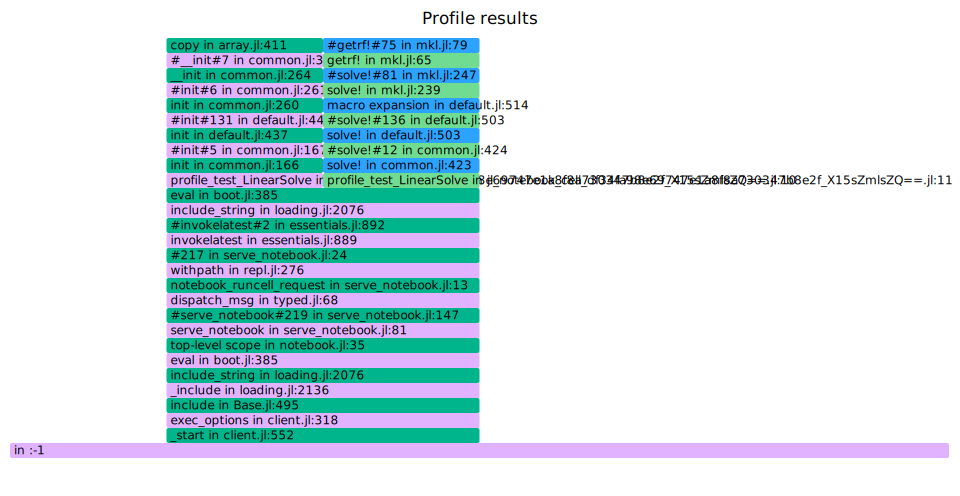

In [25]:
profile_test_LinearSolve(A, b1)
ProfileSVG.@profview profile_test_LinearSolve(A, b1)

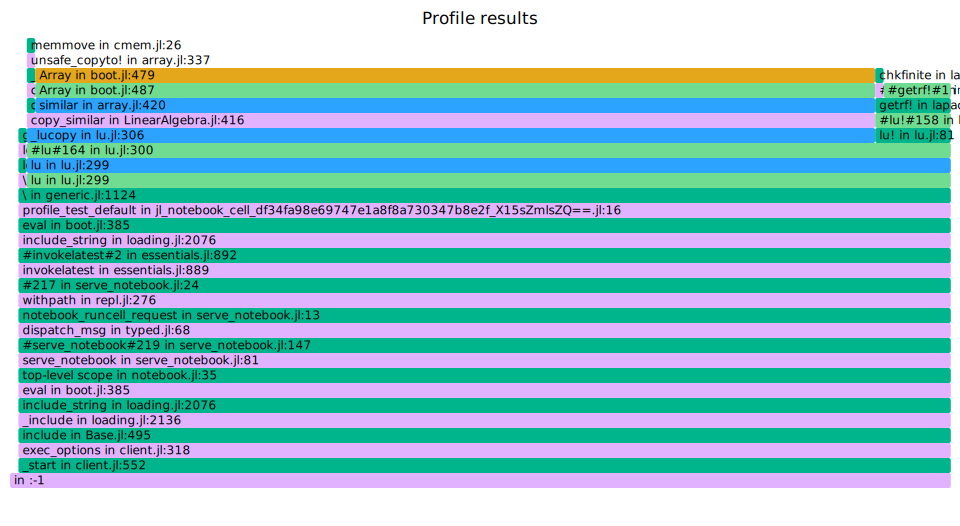

In [26]:
profile_test_default(A, b1)
ProfileSVG.@profview profile_test_default(A, b1)

To see how accurate the LinearSolver is compared to `A\b`, we will do a naive approach and just multiply them and see

In [55]:
using Test
n = 10
A = rand(n, n);
true_b = rand(n);

x1 = profile_test_LinearSolve(A, true_b);
x2 = profile_test_default(A, true_b);

b1 = A*x1;
b2 = A*x2;

println("b =")
show(stdout, "text/plain", true_b)

println("\n\nResult from LinearSolve: \nb1 =")
show(stdout, "text/plain", b1)
# println("\n\nSolving with LinearSolve.jl: \nx =")
# show(stdout, "text/plain", x1)

println("\n\nResult from A\\b: \nb2 =")
show(stdout, "text/plain", b2)
# println("\n\nSolving with `A\\b`: \nx =")
# show(stdout, "text/plain", A \ b1)
println("\n")

# @test true_b - b1 ≈ zeros(n) atol=1e-15
# @test true_b - b2 ≈ zeros(n) atol=1e-15
@show true_b - b1;
@show true_b - b2;

b =
10-element Vector{Float64}:
 0.7597105998455828
 0.9482780241631718
 0.32430627790424316
 0.2653937977403654
 0.810303226093196
 0.6773212041751578
 0.6656312594818362
 0.19428827820561756
 0.34837750937664713
 0.7556485200258369

Result from LinearSolve: 
b1 =
10-element Vector{Float64}:
 0.7597105998455816
 0.9482780241631712
 0.3243062779042436
 0.26539379774036465
 0.8103032260931964
 0.677321204175158
 0.6656312594818361
 0.19428827820561745
 0.34837750937664724
 0.7556485200258366

Result from A\b: 
b2 =
10-element Vector{Float64}:
 0.7597105998455829
 0.9482780241631721
 0.32430627790424305
 0.2653937977403653
 0.8103032260931959
 0.6773212041751582
 0.6656312594818368
 0.19428827820561734
 0.34837750937664724
 0.7556485200258372

true_b - b1 = [1.1102230246251565e-15, 5.551115123125783e-16, -4.440892098500626e-16, 7.771561172376096e-16, -3.3306690738754696e-16, -1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, -1.1102230246251565e-16, 3.33066907387546

We then can try seeing what the accuracy looks like with the normilated error as we increase the size of A. 

In [147]:
using Plots
# function norm_err_func(b, x)
#     norm_err = LA.norm(true_b - x)
#     norm_err
# end

function run_sim(sim_amt, n)
    sims = zeros(sim_amt, 4)
    for k in 1:sim_amt
        A = rand(n, n);
        true_b = rand(n);
        x1 = profile_test_LinearSolve(A, true_b);
        sims[k, 1] = @elapsed profile_test_LinearSolve(A, true_b)
        sims[k, 2] = LA.norm(true_b - A*x1)
        
        x2 = profile_test_default(A, true_b)
        sims[k, 3] = @elapsed profile_test_default(A, true_b)
        sims[k, 4] = LA.norm(true_b - A*x2)
    end
    sims
end

# function run_sim_def(sim_amt, n)
#     sims = zeros(sim_amt, 2)
#     for k in 1:sim_amt
#         A = rand(n, n);
#         true_b = rand(n);
#         x = profile_test_default(A, true_b);
#         sims[k, 1] = @elapsed profile_test_default(A, true_b)
#         sims[k, 2] = LA.norm(true_b - A*x)
#     end
#     sims
# end

sim_amt = 100
n = 200;
sims = run_sim(sim_amt, n);

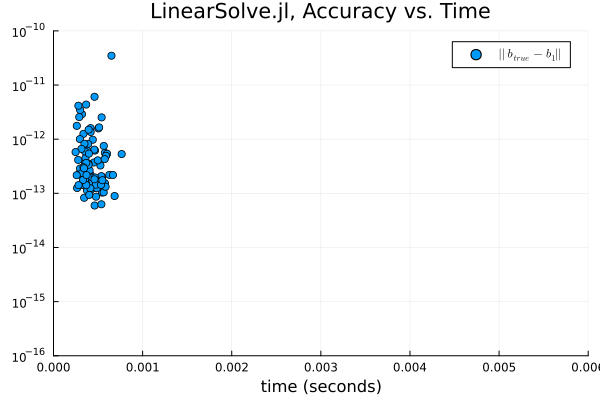

In [148]:
# lin = run_sim_lin(sim_amt, n)
# yscale=:log10,
scatter(sims[:, 1], sims[:, 2], yscale=:log10, ylims=(1e-16, 1e-10), xlims=(0, 0.006), label="\$\\vert \\vert b_{true} - b_1 \\vert \\vert\$", xlabel="time (seconds)", title="LinearSolve.jl, Accuracy vs. Time")

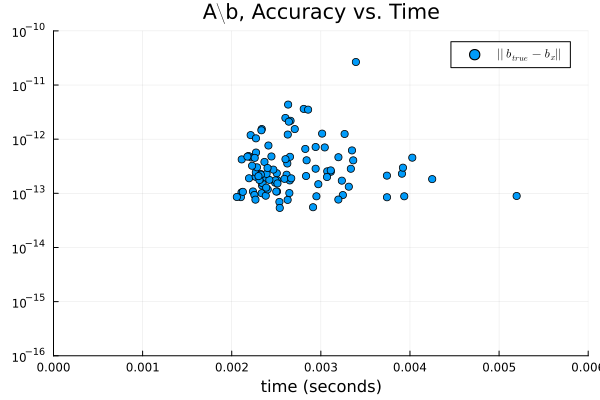

In [149]:
# def = run_sim_def(sim_amt, n)
scatter(sims[:, 3], sims[:, 4], yscale=:log10, ylims=(1e-16, 1e-10), xlims=(0, 0.006), label="\$\\vert \\vert b_{true} - b_x \\vert \\vert\$", xlabel="time (seconds)", title="A\$\\backslash\$b, Accuracy vs. Time")
# scatter(norm_err_func(b2), yscale=:log10, ylims=(1e-17, 1e-10), xlims=(1, n+1), label="\$\\vert \\vert b_{true} - b_2 \\vert \\vert\$", xlabel="\$k\$")

As you can see with the graphs above, LinearSolve.jl actually is about the roughly about the same accuracy as `A\b`, however the speed up is much faster with LinearSolve. 

### My own questions

One question that I have about the software specifically is, how specifically does LinearSolver achieve better optimization than BLAS? Since to my knowledge BLAS uses low-level routines which should mean that it has a better understanding of those lower-level optimizations and can make those optimizations there. Is Julia so lightweight that it can do so or find ways to overall be faster than BLAS?

### A possible experiment

One experiment that would be interesting to explore for the group project would be to actually use LinearSolve in an actual simulation/model and then test it against the standard `A \ b` and see what hiccups and speed ups would arise. The experiment would measure overall runtime over different sized simulations and then compare them to the standard linear solving.